In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\acer\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
titanic_df = pd.read_csv('Titanic.csv')
titanic_df.head()     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#EDA

titanic_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Based on the provided description:

1. Total Passenger Records: The dataset contains information on 891 passengers.

2. Average Age of Passengers: The average age of the passengers in the dataset is approximately 30 years old. This gives us a general idea of the age distribution within the passenger population.

3. Average Fare Price: The average fare price paid by passengers is around 32.20(in dollars). This represents the typical cost of a ticket for the journey. Additionally, it's mentioned that the maximum fare price recorded in the dataset is approximately 512.32(in dollars). This indicates that while the average fare is relatively low, there are some outliers with significantly higher fares, possibly due to premium accommodations or other factors.

These insights provide a basic understanding of the passenger demographics and ticket pricing within the dataset, which can be further analyzed and interpreted to gain deeper insights into factors affecting passenger demographics and ticket pricing on the Titanic.

In [9]:
titanic_df.isna().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# filling age column with mean value of age column
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)   

# filling embarked coloumn with mode value of the column
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace =True)


In [11]:
# dropping not necessary column 
titanic_df.drop(columns = ['PassengerId','Name','Cabin','Ticket'], axis=1, inplace = True)

In [12]:
titanic_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
titanic_df.duplicated().sum() 

111

In [14]:
titanic_df.nunique()  

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [16]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [18]:
titanic_df.corr()   

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


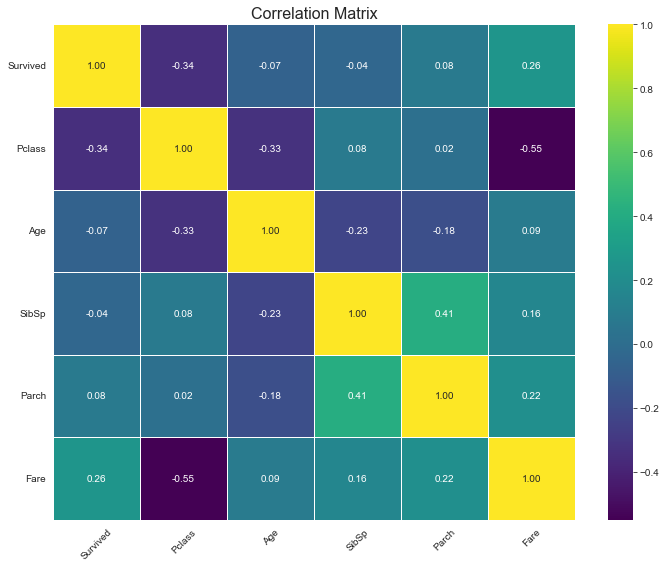

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = titanic_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [25]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Visualization


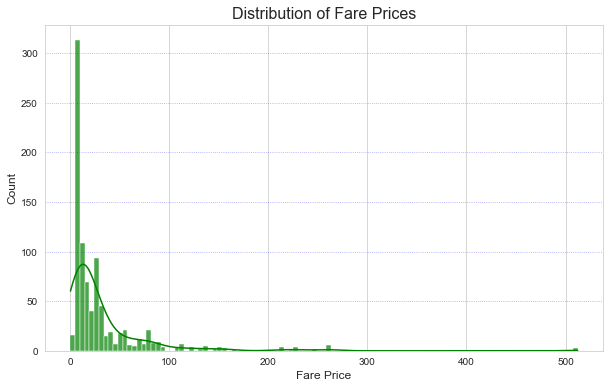

In [26]:
sns.set_style("whitegrid")

# Plotting histogram for fare price
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Fare', kde=True, color='green', alpha=0.7)

# Add title and labels
plt.title('Distribution of Fare Prices', fontsize=16)
plt.xlabel('Fare Price', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add grid
plt.grid(axis='y', linestyle=':', alpha=0.4, color='blue')

# Show plot
plt.show()


The observation made from the distribution plot of fare prices indicates that the majority of tickets were sold within the price range of 1-50 dollars. This means that a large proportion of passengers paid fares falling within this price range.

The conclusion drawn from this observation is that the fare column exhibits high skewness. Skewness refers to the lack of symmetry in a distribution. When a distribution is skewed, it means that the data is not evenly distributed around the mean and may have a longer tail on one side than the other.

In this case, since the majority of fares are concentrated in the lower price range (1-50 dollars), while fewer fares are distributed in the higher price range, the distribution of fares is skewed towards the lower end. This suggests that there is an asymmetry in the distribution of fare prices, with a higher density of lower-priced fares compared to higher-priced fares.

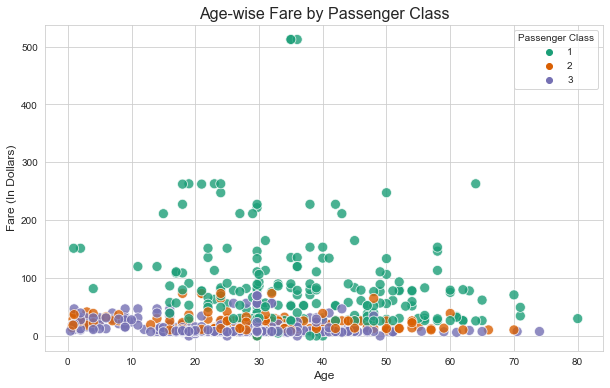

In [30]:
sns.set_style("whitegrid")

# Plotting scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Pclass', palette='Dark2', alpha=0.8, s=100)

# Add title and labels
plt.title('Age-wise Fare by Passenger Class', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare (In Dollars)', fontsize=12)

# Add legend
plt.legend(title='Passenger Class')

# Show plot
plt.show()


The observation made here suggests two key points based on the data analysis:

1. Most tickets are sold from 3rd class: This observation indicates that the majority of passengers purchased tickets for the third class. This finding suggests that there was a higher demand for third-class tickets compared to first and second-class tickets. This could be due to various factors such as affordability, availability, or other preferences among passengers.

2. 1st class tickets are costlier than class 2 and class 3: This observation confirms the intuitive expectation that first-class tickets are more expensive than second and third-class tickets. This price difference reflects the amenities, services, and overall luxury associated with traveling in the first class compared to the lower classes. Passengers willing to pay a premium for enhanced comfort, luxury, and services may opt for first-class tickets, leading to the higher price point observed.

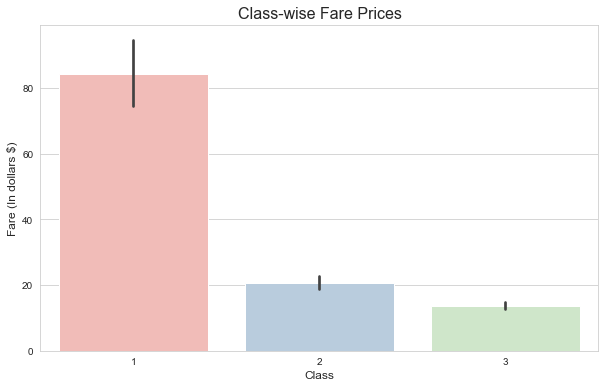

In [32]:
# Set style
sns.set_style("whitegrid")

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic_df, x='Pclass', y='Fare', palette='Pastel1')

# Add title and labels
plt.title('Class-wise Fare Prices', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Fare (In dollars $)', fontsize=12)

# Show plot
plt.show()

OBSERVATION:

1. 1st class having highest fare price.
2. 3rd class having lowest fare price.

In [33]:
class_count = titanic_df['Pclass'].value_counts() 

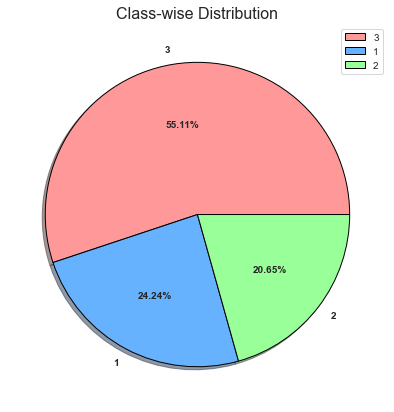

In [36]:
# Define custom colors for dark pastel palette
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Set up the figure
plt.figure(figsize=(10, 7))

# Plotting pie chart for class counts with custom colors
plt.pie(class_count, labels=class_count.index, autopct='%.2f%%', shadow=True,
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, colors=colors,
        textprops={'weight': 'bold'})

# Add legend, title, and show plot
plt.legend()
plt.title('Class-wise Distribution', fontsize=16)
plt.show()

The observation from the pie chart indicates the distribution of ticket sales across different passenger classes. Here's a summary:

1. Highest Ticket Sales: The pie chart shows that the highest proportion of tickets sold is from the third class, accounting for approximately 55.11% of total ticket sales. This suggests that a majority of passengers opted for third-class accommodations.

2. Lowest Ticket Sales: Conversely, the lowest proportion of ticket sales is from the second class, representing about 20.65% of total ticket sales. This indicates that a smaller percentage of passengers chose second-class accommodations compared to first and third-class options.

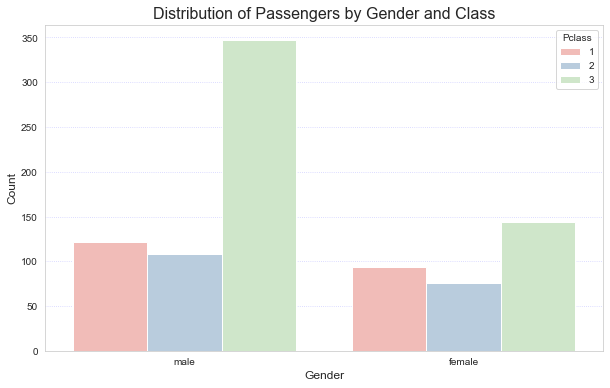

In [38]:
sns.set_style("whitegrid")

# Plotting count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Sex', hue='Pclass', palette='Pastel1')

# Add title and labels
plt.title('Distribution of Passengers by Gender and Class', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add grid
plt.grid(axis='y', linestyle=':', color='blue', alpha=0.2)

# Show plot
plt.show()

Observation:

Both male and female passengers predominantly traveled in the third class.

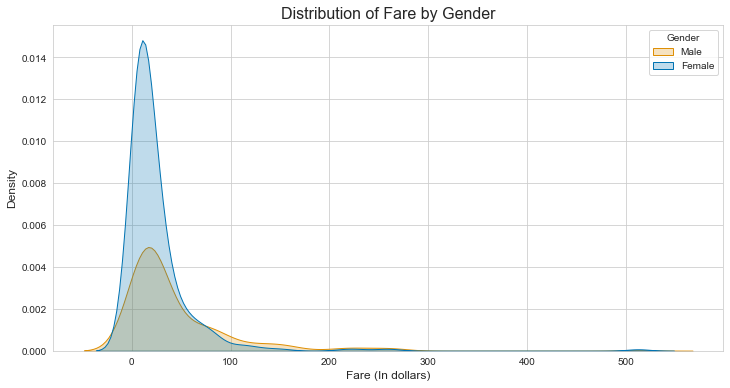

In [40]:
sns.set_style("whitegrid")

# Plotting KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=titanic_df, x='Fare', hue='Sex', fill=True, palette='colorblind')

# Add title and labels
plt.title('Distribution of Fare by Gender', fontsize=16)
plt.xlabel('Fare (In dollars)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add legend
plt.legend(title='Gender', labels=['Male', 'Female'])

# Show plot
plt.show()

OBSERVATION:

Based on the analysis, it can be inferred that the number of male passengers is greater than the number of female passengers.

<Figure size 864x576 with 0 Axes>

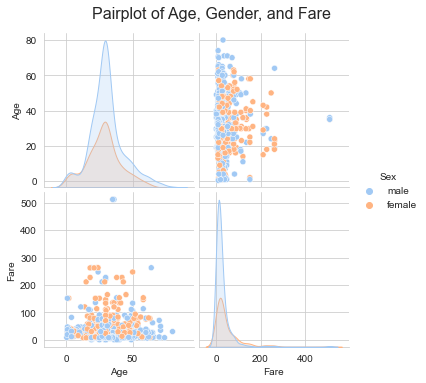

In [46]:
sns.set_style("whitegrid")


plt.figure(figsize=(12, 8))
sns.pairplot(data=titanic_df, vars=['Age', 'Fare'], hue='Sex', palette='pastel')

# Add title
plt.suptitle('Pairplot of Age, Gender, and Fare', y=1.05, fontsize=16)

# Show plot
plt.show()

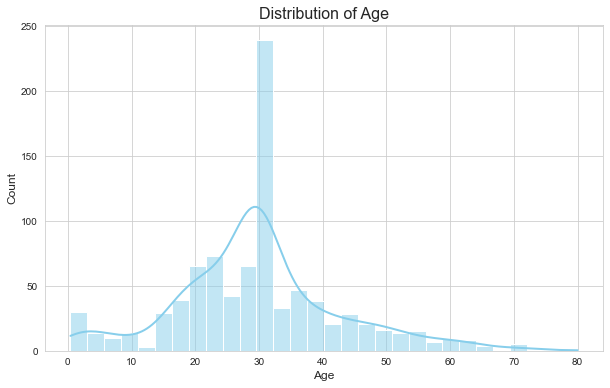

In [48]:
sns.set_style("whitegrid")

# Plotting histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Age', kde=True, color='skyblue', line_kws={'linewidth': 2})

# Add title and labels
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show plot
plt.show()

OBSERVATION:

1. The majority of passengers fall within the age range of 20 to 40 years, based on the analysis of the dataset. This observation indicates that a significant portion of the passengers is between the ages of 20 and 40.
2. Maximum of passengers are in the age range of 29-32.

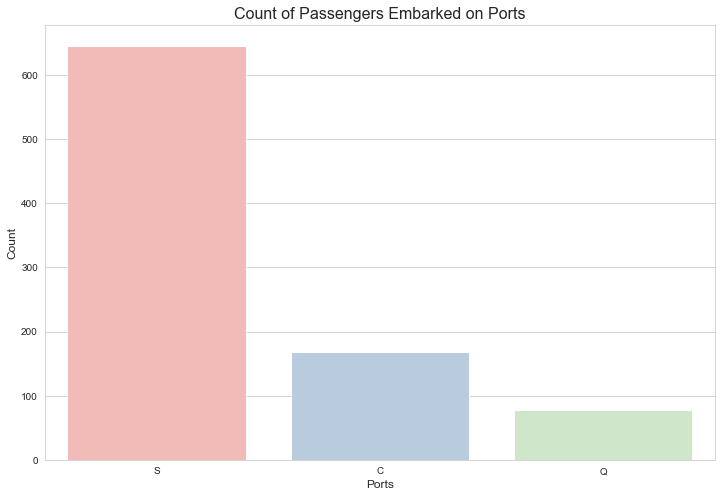

In [49]:
sns.set_style("whitegrid")

# Plotting countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=titanic_df, x='Embarked', palette='Pastel1')

# Add title and labels
plt.title('Count of Passengers Embarked on Ports', fontsize=16)
plt.xlabel('Ports', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show plot
plt.show()


The observation reveals the distribution of passengers embarking from three ports: Southampton (S), Cherbourg (C), and Queenstown (Q).

1. Southampton (S): The port had the highest number of embarked passengers, around 650 individuals, indicating it as the primary embarkation point.

2. Queenstown (Q): It had the lowest number of embarked passengers, approximately 90 individuals, suggesting it contributed the least to the total embarked passengers.

This information sheds light on the embarkation distribution among the analyzed ports, highlighting Southampton as the primary embarkation point and Queenstown as the least utilized port.

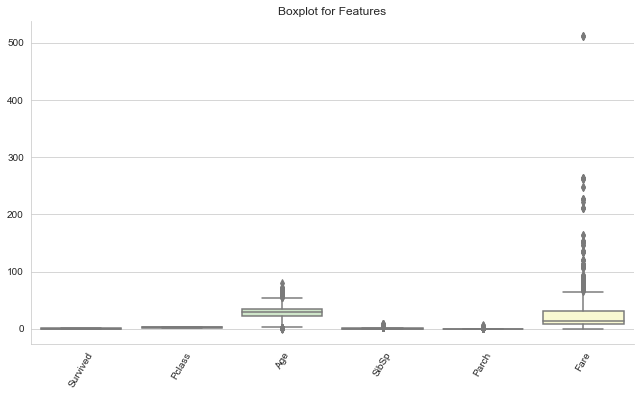

In [50]:
sns.set_style("whitegrid")
sns.catplot(data=titanic_df, kind='box',palette='Pastel1',aspect=1.8)
plt.title('Boxplot for Features')
plt.xticks(rotation=60)
plt.show()

OBSERVATION:

As anticipated, the presence of outliers in the 'Fare' column is consistent with expectations, given the potential variations in fare prices arising from different situations and passenger classes.

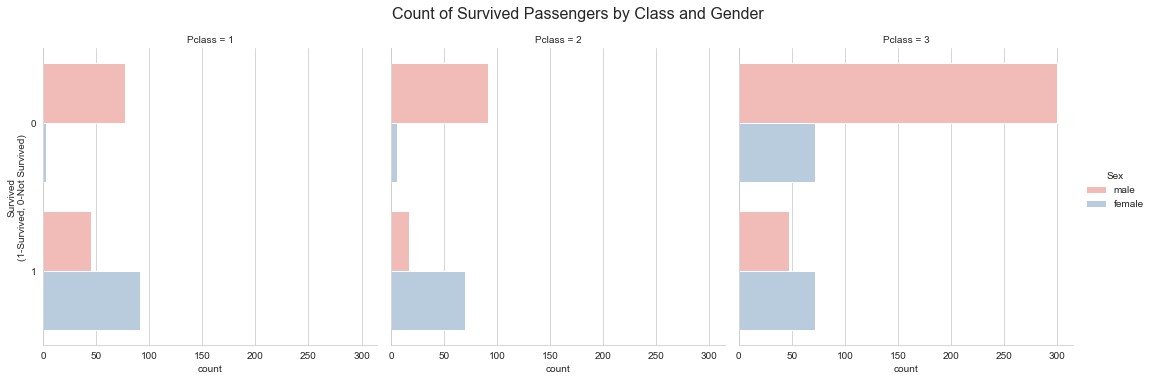

In [52]:
sns.set_style("whitegrid")

# Plotting countplot
g = sns.catplot(data=titanic_df, y='Survived', kind='count', hue='Sex', palette='Pastel1', col='Pclass')

# Add title and labels
g.fig.suptitle('Count of Survived Passengers by Class and Gender', y=1.05, fontsize=16)
g.set_ylabels('Survived\n(1-Survived, 0-Not Survived)')

# Show plot
plt.show()

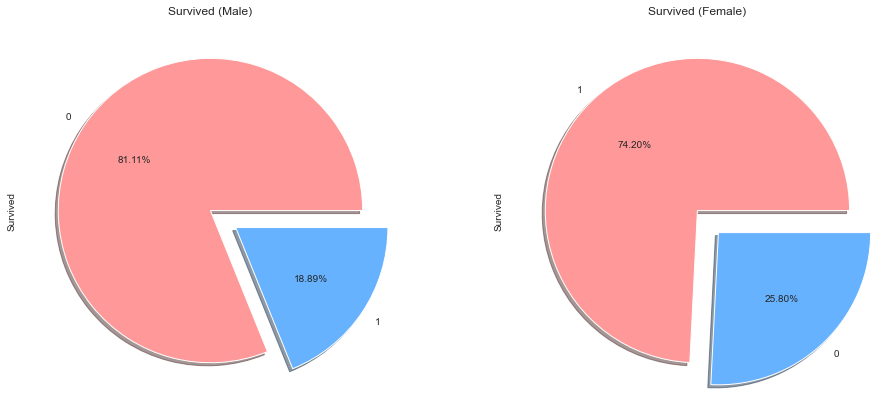

In [55]:
# Set up subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
pastel_colors = ['#FF9999', '#66B2FF']

# Plot pie chart for survival of males
titanic_df['Survived'][titanic_df['Sex']=='male'].value_counts().plot.pie(explode=[0, 0.2], autopct='%.2f%%',
                                                                         ax=ax[0], shadow=True, colors=pastel_colors)
# Set title for subplot 1
ax[0].set_title('Survived (Male)')

# Plot pie chart for survival of females
titanic_df['Survived'][titanic_df['Sex']=='female'].value_counts().plot.pie(explode=[0, 0.2], autopct='%.2f%%',
                                                                            ax=ax[1], shadow=True, colors=pastel_colors)
# Set title for subplot 2
ax[1].set_title('Survived (Female)')

# Display the plot
plt.show()

The observation from the analysis of survival rates after the disaster reveals several key findings:

1. Gender-based Prioritization: The visual analysis suggests a prioritization of females during rescue operations. This is evidenced by a significantly higher survival rate among females compared to males. Efforts were likely concentrated on ensuring the safety and well-being of female passengers.

2. Gender Disparity in Survival Rates: The survival rate among males is notably lower, with only approximately 18.89% of male passengers surviving the disaster. This stark difference in survival rates indicates that a significant proportion of male passengers did not survive.

3. Class-based Prioritization: The analysis also reveals a class-based prioritization during rescue operations. First-class passengers had the highest survival rate, followed by second-class passengers, and finally third-class passengers. This indicates a strategic approach to rescue efforts, where individuals from higher-class accommodations were attended to with greater urgency.

4. Survival Rate Summary: From the pie chart, it is evident that only 18.89% of male passengers and 25.80% of female passengers survived the disaster. This summary provides a clear depiction of the gender disparity in survival rates.

In summary, the analysis provides insights into the differential treatment of passengers based on gender and class during the disaster, highlighting the challenges and priorities faced during rescue operations.